In [2]:
from skimage.io import imshow, imread
from skimage.color import rgb2gray
from skimage.filters import threshold_otsu
from skimage.morphology import closing
from skimage.measure import label, regionprops, regionprops_table
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from tqdm import tqdm
import os

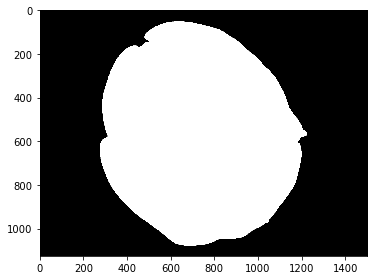

In [3]:
# get the filenames of the leaves under the directory “Leaves”
image_path_list = os.listdir("input/Melati")
# looking at the first image
i = 1
image_path = image_path_list[i]
image = rgb2gray(imread("input/Melati/"+image_path))
imshow(image)

c:\Users\Bagus\anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


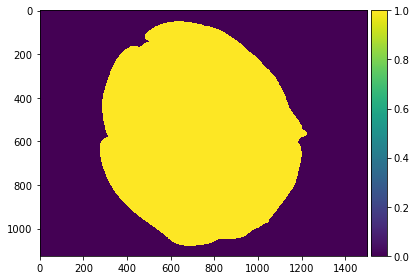

In [4]:
label_img = label(image)
imshow(label_img)

In [5]:
table = pd.DataFrame(regionprops_table(label_img, image,
                                       ['convex_area', 'area',
                                        'eccentricity', 'extent',                   
                                        'inertia_tensor',
                                        'major_axis_length', 
                                        'minor_axis_length']))
table['convex_ratio'] = table['area']/table['convex_area']
table['label'] = image_path[:]
table

,convex_area,area,eccentricity,extent,inertia_tensor-0-0,inertia_tensor-0-1,inertia_tensor-1-0,inertia_tensor-1-1,major_axis_length,minor_axis_length,convex_ratio,label
0,730739,720353,0.499174,0.742961,52542.807574,-6123.912186,-6123.912186,63654.202559,1030.471768,892.905425,0.985787,J-S-002.png


In [7]:
image_path_list = os.listdir("input/Melati")
df = pd.DataFrame()
for i in range(len(image_path_list)):
    image_path = image_path_list[i]
    image = rgb2gray(imread("input/Melati/"+image_path))
    label_img = label(image)
    
    table = pd.DataFrame(regionprops_table(label_img, image,
                            ['area', 'eccentricity',                         
                             'major_axis_length', 'minor_axis_length']))
    table['label'] = image_path[0:1]
    #table = table[1:]
    
    df = pd.concat([df, table], axis=0)

df.reset_index(inplace=True)
df.drop('index', axis = 1, inplace=True)
df

,area,eccentricity,major_axis_length,minor_axis_length,label
0,785135,0.625901,1139.782832,888.919581,J
1,720353,0.499174,1030.471768,892.905425,J
2,612151,0.635030,1011.203449,781.141730,J
3,622521,0.461559,955.273824,847.432574,J
4,624444,0.644741,1029.796622,787.177306,J
5,688069,0.572260,1038.140045,851.349636,J
6,895173,0.729320,1297.334495,887.600846,J
7,794186,0.631428,1152.303058,893.535598,J
8,583727,0.510992,935.052433,803.757495,J
9,801812,0.344402,1048.294471,984.162261,J


In [8]:
df.shape

(25, 5)

In [19]:
from pathlib import Path  
filepath = Path('csv/melati.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
df.to_csv(filepath, index=False)  